
# 實戰1. 來處理一下鐵達尼


## 目標
我們使用Kaggle的鐵達尼號資料集來教你繪圖的基本操作

## 資料集位置
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/300px-RMS_Titanic_3.jpg"  style="margin-left:0px;margin-top:15px;margin-bottom:15px;">
https://www.kaggle.com/c/titanic/data
1. 需要登入才能下載
2. 只取裡面的train.csv來做繪圖


## ✔ 鐵達尼號 + Seaborn
1. 使用Pandas先將鐵達尼號的資料讀取出來
2. Survied欄位: 0代表無法倖存的乘客  1代表倖存的乘客
3. 以下是每個欄位代表的意思
<img src="./titanic.png"  style="margin-left:0px;margin-top:15px;margin-bottom:15px;">


In [6]:
import pandas as pd
# 為了顯示的漂亮, 我刻意的把印出來的row只顯示20個和column只顯示十個, 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10)

df = pd.read_csv("train.csv", encoding = "utf-8")
df

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,...,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,...,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,...,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,...,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,...,0,237736,30.0708,NaN,C


## 資料預處理
只要我們在處理的是現實的資料，一定會遇到資料空缺的情況，我們會需要先對資料處理一些基本的處理，通常最簡單的預處理我會做下面這幾步
1. 先看一下空缺多少了格子
2. 根據1的結果Drop掉我覺得不需要的欄位(覺得補上空缺沒有意義或者你覺得那個欄位對你幫助不大)
3. 將字串資料轉換成類別標籤
4. 補上空缺值

In [7]:
# Step1. 檢查每個欄位到底有多少空缺值
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Step2. 我選擇Drop掉Ticket(意義太少), Cabin(缺失太多), Name(可以有意義, 但需要特別經過處理把稱謂拿出, 我們今天先放掉他)
df = df.drop(["Ticket", "Cabin", "Name"], axis = 1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


## Import函式庫以及利用Notebook
1. 由於Seaborn是基於Matplotlib的函式庫，所以正常寫法下，你一樣得在最後一行加上plt.show()印出圖形
2. 在Jupyter Notebook裡使用的時候其實可以透過他提供給我們的簡便工具來簡化我們使用
3. (重要，且只有Notebook可以用) 加上%matplotlib inline這行的話，你就可以在每次做圖的時候少打plt.show()

In [9]:
# 大家這裡習慣給他改名成sns
import seaborn as sns
# 這行只有在Jupyter Notebook可以使用
%matplotlib inline

## ✔ 數量圖
1. 數量圖是在類別做圖的時候一個很好用的圖示工具，統計各個類別分別有多少數量
2. 使用seaborn.countplot，我們通常選擇只設置其中一軸，另一軸就是數量
3. 你可以藉由palette這個參數來選擇一下你喜歡的整體色系
4. palette: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

/Users/Elwing/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


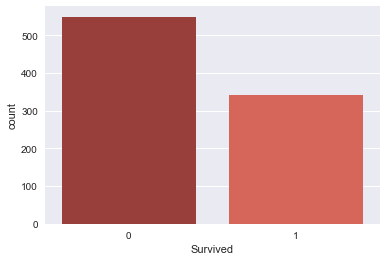

In [10]:
# 針對一個類別做數量圖,由於我們inline了matplotlib,所以不需要plt.show()
# 設置x軸的往上長的長條圖
sns.countplot(x = df["Survived"], palette = "Reds_d")

/Users/Elwing/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


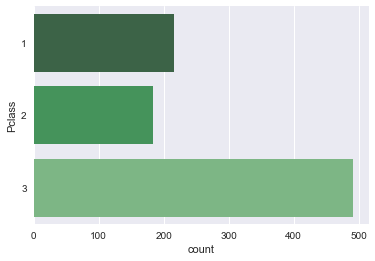

In [11]:
# 針對一個類別做數量圖,由於我們inline了matplotlib,所以不需要plt.show()
# 設置y軸的往右長的長條圖
# 畫出各艙等的人數
sns.countplot(y = df["Pclass"], palette = "Greens_d")

/Users/Elwing/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


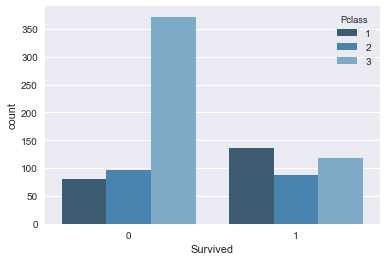

In [12]:
# 結合上面兩個,把一個區域的長條加入第二個特徵,統計第二個特徵＋第一個特徵的數目
# hue裡面放的就是第二個特徵
# 你找到了其中一個相關性: 第三艙等的存活率稍微低了一點
sns.countplot(x = df["Survived"], hue = df["Pclass"], palette = "Blues_d")

## ✔ FacetGrid網格圖 + 分布圖

### FacetGrid網格圖
1. FacetGrid網格圖是你可以固定變數的一種圖形，你設定的欄位會把所有可能的值拿出來，變出這麼多圖出來
2. 可以設定row和col，你的圖的數量就等於 row可能數 * col可能數
3. 使用FacetGrid來創造，記得最後要給你的每個圖一個畫圖方式(ex. 分布圖)
4. FacetGrid是一個跟pandas非常友善的設計，你可以將DataFrame直接丟給第一個參數
5. 使用FacetGrid的主因之一是我們要做出分布圖(x軸是連續的)，但連續的東西我們沒辦法像上面的countplot分成三條來看，會看不出連續的趨勢

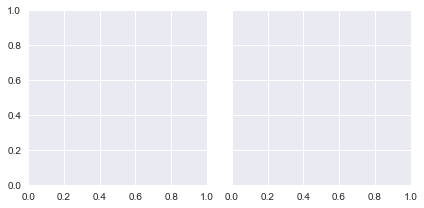

In [13]:
# 對每一個網格裡的圖做下面的初始化
# 由於剛剛已經設定完data, 這裡直接給他欄位的名稱當x軸即可
fg = sns.FacetGrid(df, col = "Survived")

### DistPlot分布圖
1. 通常我們使用了網格圖以後，我們需要對每個圖初始化，我們常用的就是分佈圖
2. 分布圖要傳入一個一個維度的群集，ex. 一個Series
3. 他會把你傳入的一維群集轉換成x軸的區間
4. 跟Countplot一個很大的不同是我們的x軸是連續的，不是分類型的
5. 你可以給你的分布圖一個顏色: https://matplotlib.org/users/colors.html

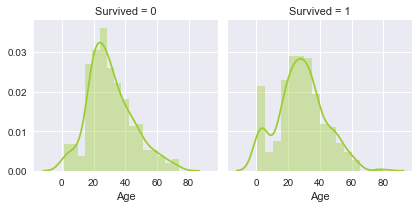

In [14]:
fg = sns.FacetGrid(df, col = "Survived")
fg.map(sns.distplot, 'Age', color = "yellowgreen", kde = True)